In [ ]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
dataset['order_month'] = dataset['order_date'].apply(lambda x : datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
dataset['gmv'] = dataset['item_price'] * dataset['quantity']
plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by province',loc = 'center',pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel ('Total Amount (Billions)',fontsize = 15)
plt.grid(color = 'darkgray', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
datadki = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10') ]
datadki.head()


In [ ]:
import matplotlib.pyplot as plt
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month' ]== '2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]

dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Daily Sold Quantity Dec 2019 - Breakdown by Brands',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Order Date', fontsize = 12)
plt.ylabel('Quantity',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()



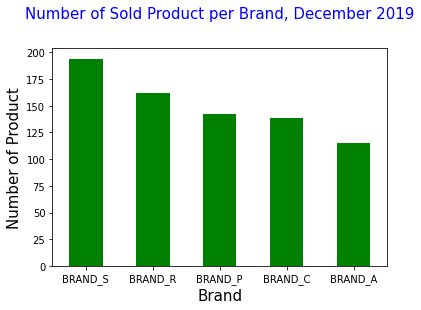

In [26]:
import matplotlib.pyplot as plt
plt.clf()
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Number of Sold Product per Brand, December 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Number of Product',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

In [22]:
dataset_top5brand_dec


,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
8,1741846,2019-12-30,16873,Jakarta Barat,DKI Jakarta,P3203,BRAND_S,32,450000,2019-12,14400000
14,1734790,2019-12-18,17422,Jakarta Selatan,DKI Jakarta,P0122,BRAND_A,12,695000,2019-12,8340000
19,1731961,2019-12-13,13880,Bogor,Jawa Barat,P2853,BRAND_R,6,740000,2019-12,4440000
35,1741561,2019-12-29,13521,Bandung,Jawa Barat,P3344,BRAND_S,2,520000,2019-12,1040000
38,1735633,2019-12-19,17096,Jakarta Selatan,DKI Jakarta,P3285,BRAND_S,4,1325000,2019-12,5300000
...,...,...,...,...,...,...,...,...,...,...,...
4988,1728964,2019-12-09,14953,Tangerang,Banten,P2582,BRAND_P,1,1185000,2019-12,1185000
4989,1735879,2019-12-19,12709,Denpasar,Bali,P3408,BRAND_S,24,240000,2019-12,5760000
4991,1736503,2019-12-20,18109,Tangerang,Banten,P2866,BRAND_R,3,1045000,2019-12,3135000
4992,1734787,2019-12-18,18283,Jakarta Selatan,DKI Jakarta,P0734,BRAND_C,2,310000,2019-12,620000


In [ ]:
top = (dataset[(dataset['order_month' == '2019-12'])()])

# MEMBUAT PIE CARD

In [ ]:
gmv_data_dki = datadki.groupby('city')['gmv'].sum().reset_index()

plt.figure(figsize = (6,6))
plt.pie(gmv_data_dki['gmv'],labels=gmv_data_dki['city'],autopct='%1.2f%%')
# auto pct disini fungsinya untuk menampilkan nilai dari pie
plt.title('GMV Contribution per City in 2019-10',loc='center',pad=30,fontsize=20,color='red')
plt.show()


In [ ]:

datadki

# Membuat Bar

In [ ]:
plt.clf()
#membuat menjadi value biasa
# datadki.groupby(['city'])['gmv'].sum().sort_values(ascending=False).plot(kind='bar',color='green') 

#Membuat stacked card
datadki.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='kde')
plt.title('GMV Per City - DKI Jakarta in Q4 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(bbox_to_anchor=(1,1),shadow=True,title='Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
datadki.groupby(['order_month','city'],)['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDki Jakarta Q4 2019',loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Mount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1),shadow=True,ncol=1,title='City')
plt.ylim(ymin=0)
labels, locations= plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Membuat Agregat Data Customer


In [ ]:
datapercustomer = datadki.groupby('customer_id').agg({'order_id':'nunique','gmv':'sum','quantity':'sum'}).rename(columns={'order_id' : 'orders'})
datapercustomer.sort_values(by = 'orders',ascending=True)
plt.clf()
plt.figure()
# plt.hist(datapercustomer['orders'],range=(1,5),color='orange')

plt.hist(datapercustomer['quantity'],range=(1,200),bins=100,color='brown')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customers', fontsize = 12)

plt.xlim(xmin=0, xmax=200)
plt.show()

# Histogram dengan range yang paling besar


In [ ]:

plt.figure(figsize=(10,5))
plt.hist(datapercustomer['gmv'],bins=100,range=(1,200000000),color='orange')
plt.xlabel('GMV',fontweight='bold',color='blue')
plt.ylabel('Number Customer',fontweight='bold',color='blue')
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.xlim(xmin=0, xmax=200000000)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(datapercustomer['quantity'], datapercustomer['gmv'])
plt.show()
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(datapercustomer['quantity'],datapercustomer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per Customer\nDKI Jakarta in Q4 2019',fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()